In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_azimuth_data(actuator, data_path, base_time=None):
    file_path = f"{data_path}/actuators/actuator_{actuator}/azimuth_angle.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

def load_rpm_data(actuator, data_path, base_time=None):
    file_path = f"{data_path}/actuators/actuator_{actuator}/thruster/motor_state.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

def load_actuator_ref(actuator, data_path, base_time):
    file_path = f"{data_path}/actuator_ref_{actuator}.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec

def load_tau_diff_data(data_path, base_time=None):
    file_path = f"{data_path}/tau_diff.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time


def load_control_action_data(data_path, base_time=None):
    file_path = f"{data_path}/dynamic_positioning/control_action.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

def load_desired_control_action_data(data_path, base_time=None):
    file_path = f"{data_path}/tau_actual.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

# NLP

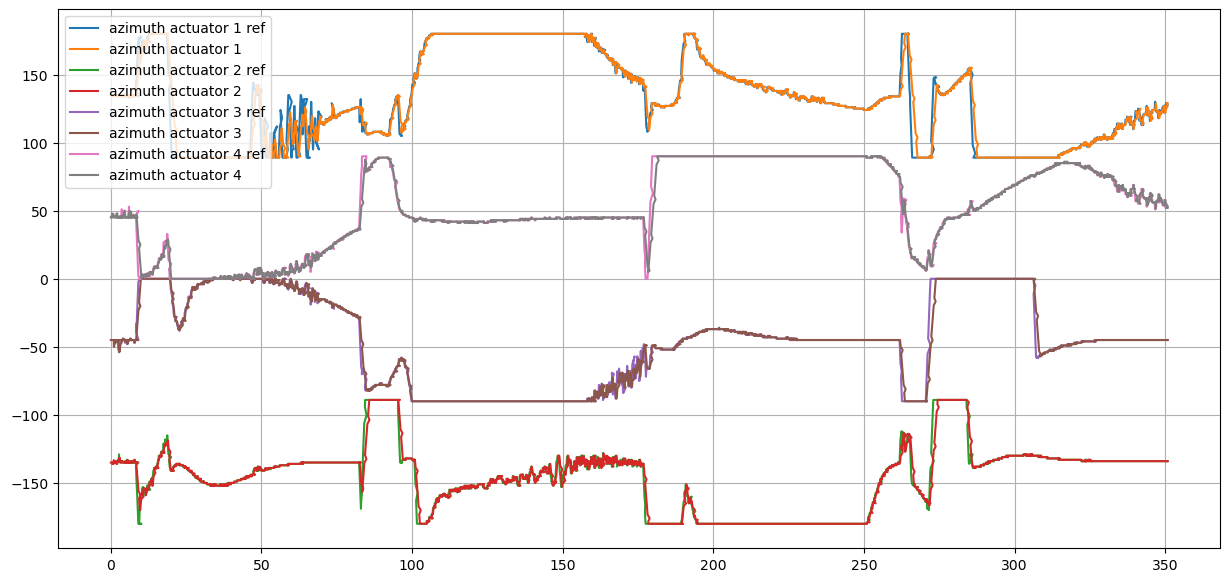

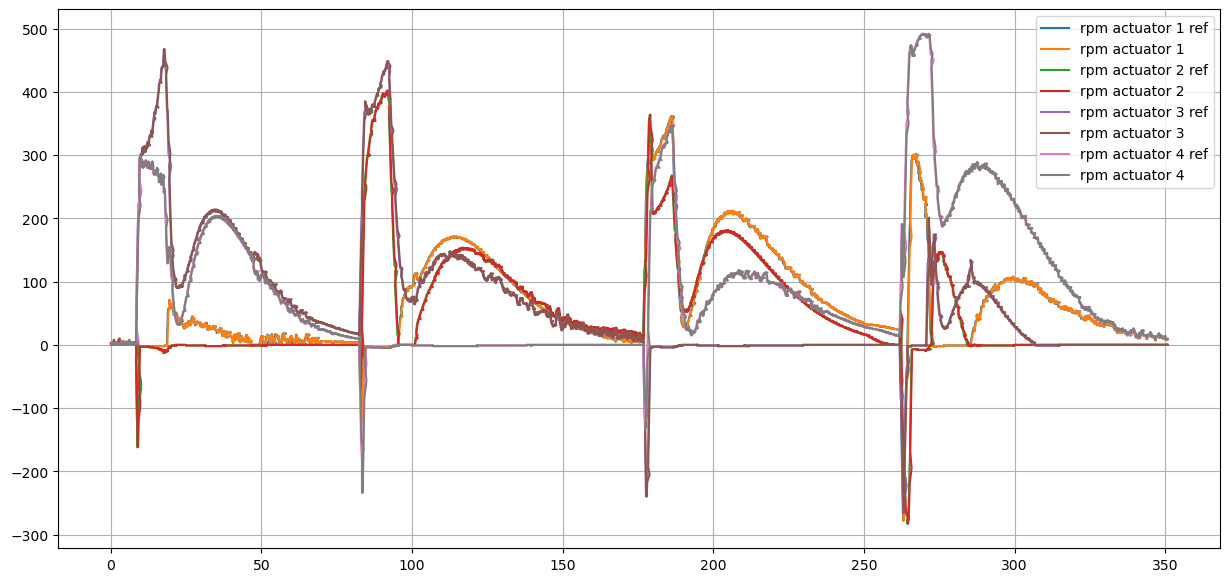

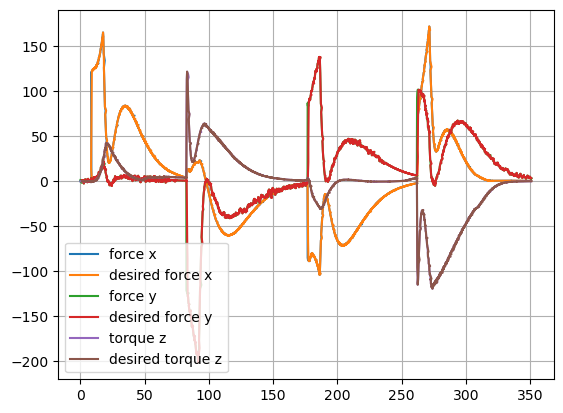

In [3]:
# Med w_angle = 10, w_neg = 50, max_rate = 1, max_force_rate = 50
base_name = "nlp1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

# tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

# plt.figure()
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
# plt.legend()
# plt.grid()
# plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

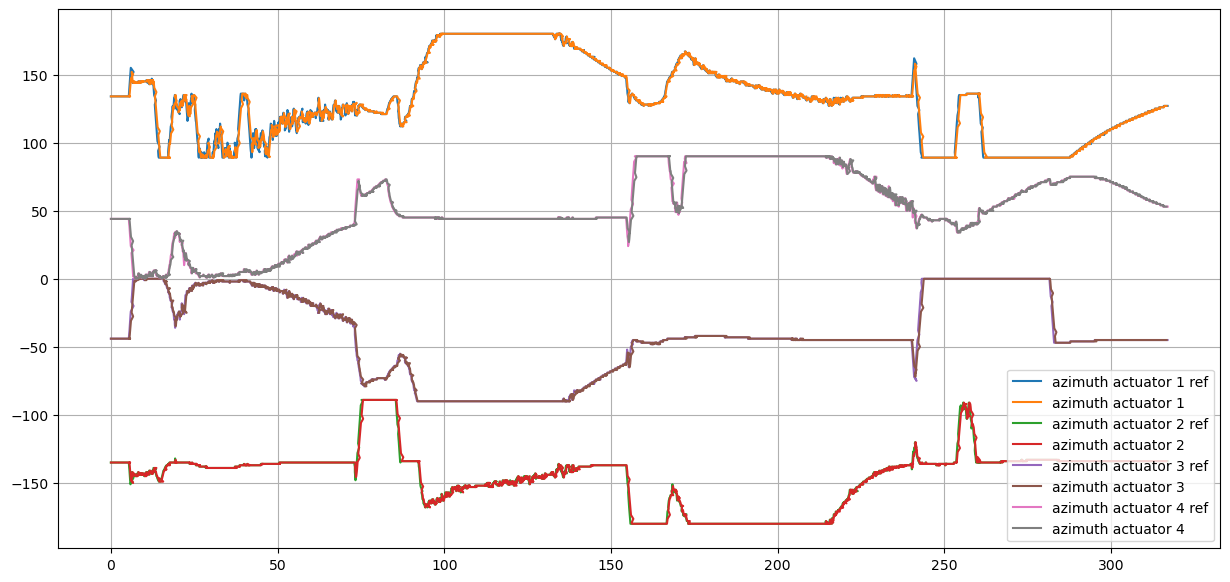

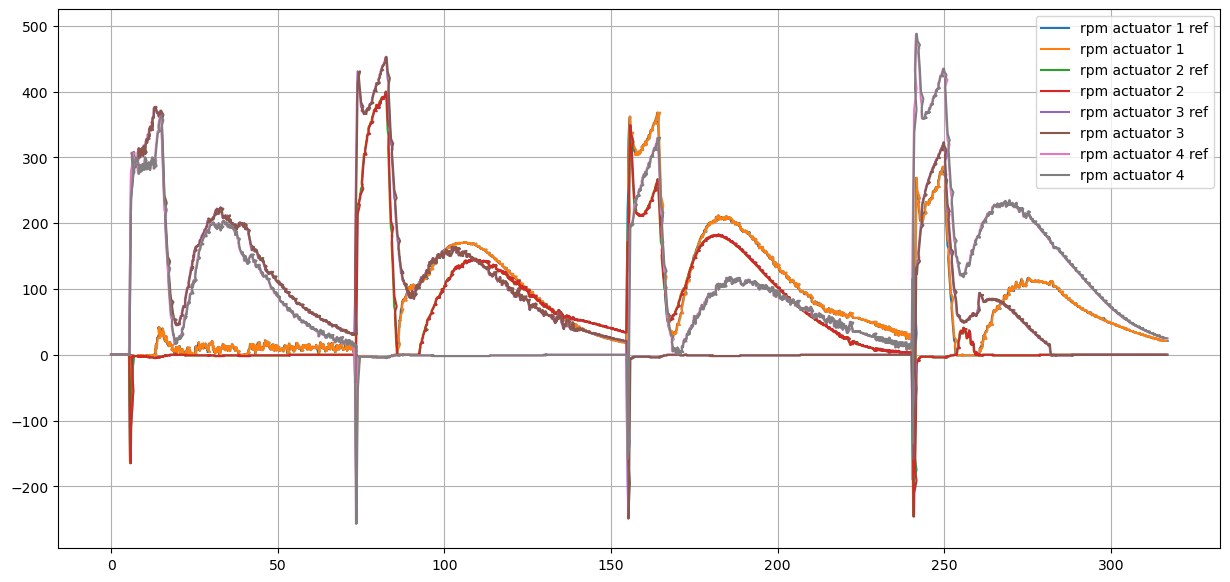

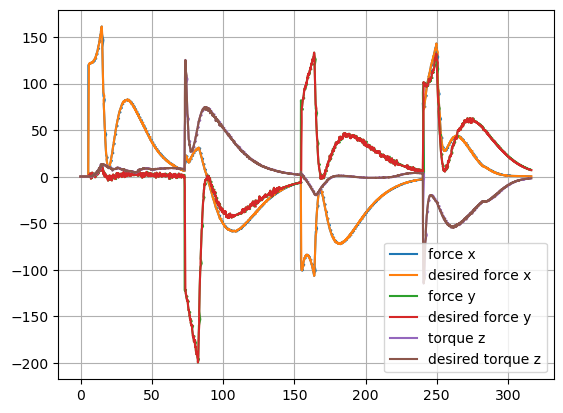

In [4]:
# Med w_angle = 50, w_neg = 50, max_rate = 0.6, max_force_rate = 100
base_name = "nlp2"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

# tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

# plt.figure()
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
# plt.legend()
# plt.grid()
# plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

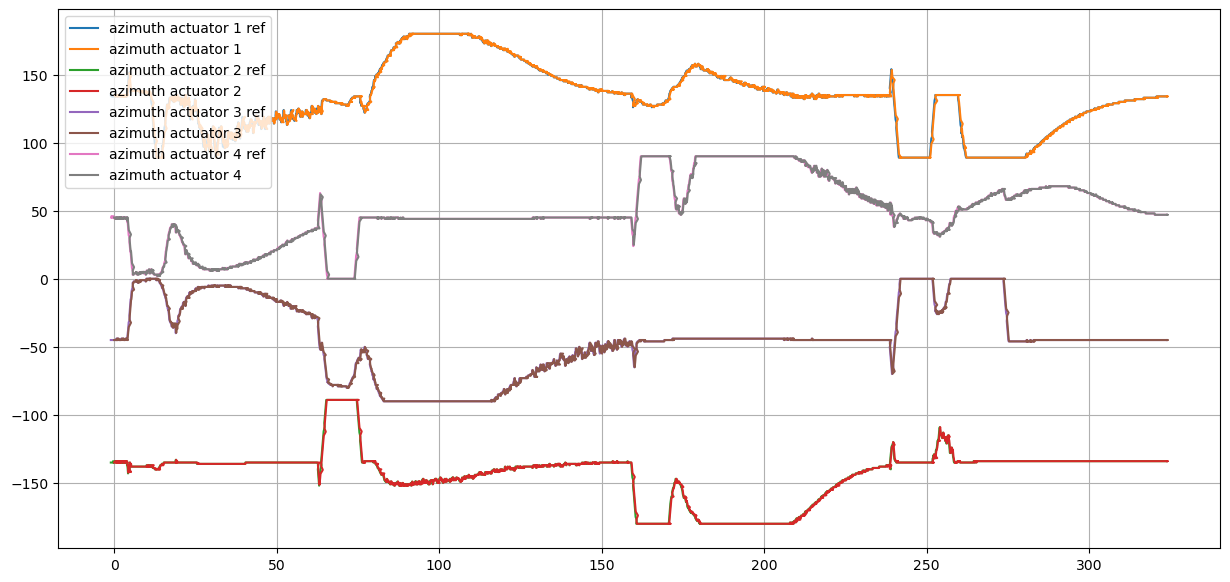

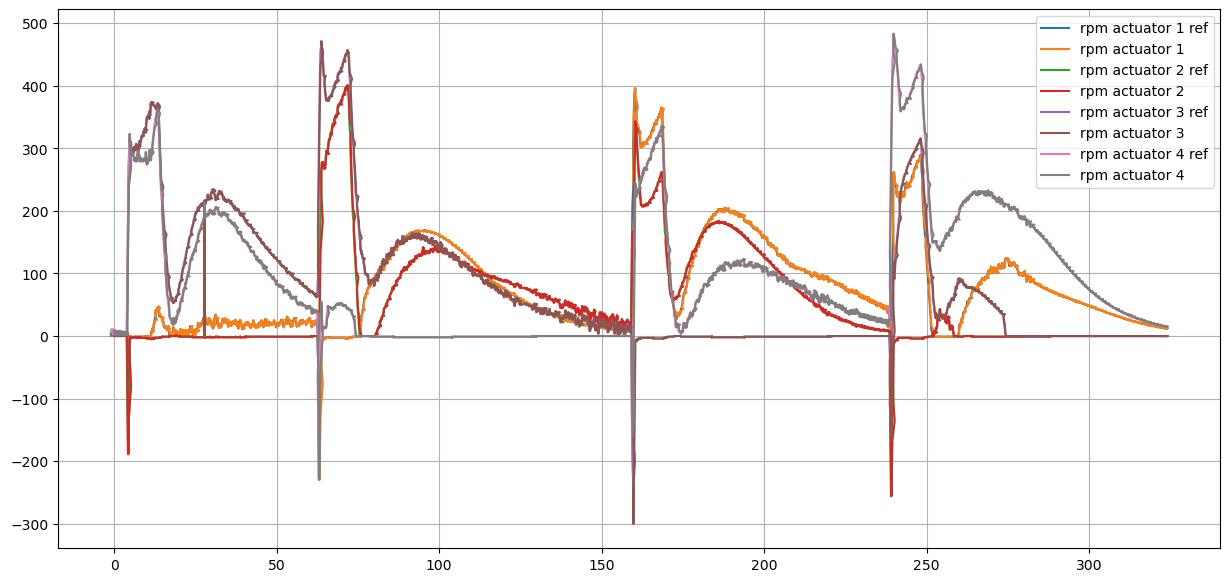

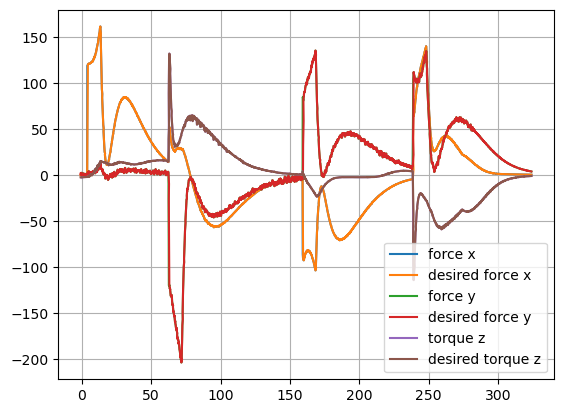

In [5]:
# Med w_angle = 150, w_neg = 50, max_rate = 0.5, max_force_rate = 100
base_name = "nlp3"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

# tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

# plt.figure()
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
# plt.legend()
# plt.grid()
# plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

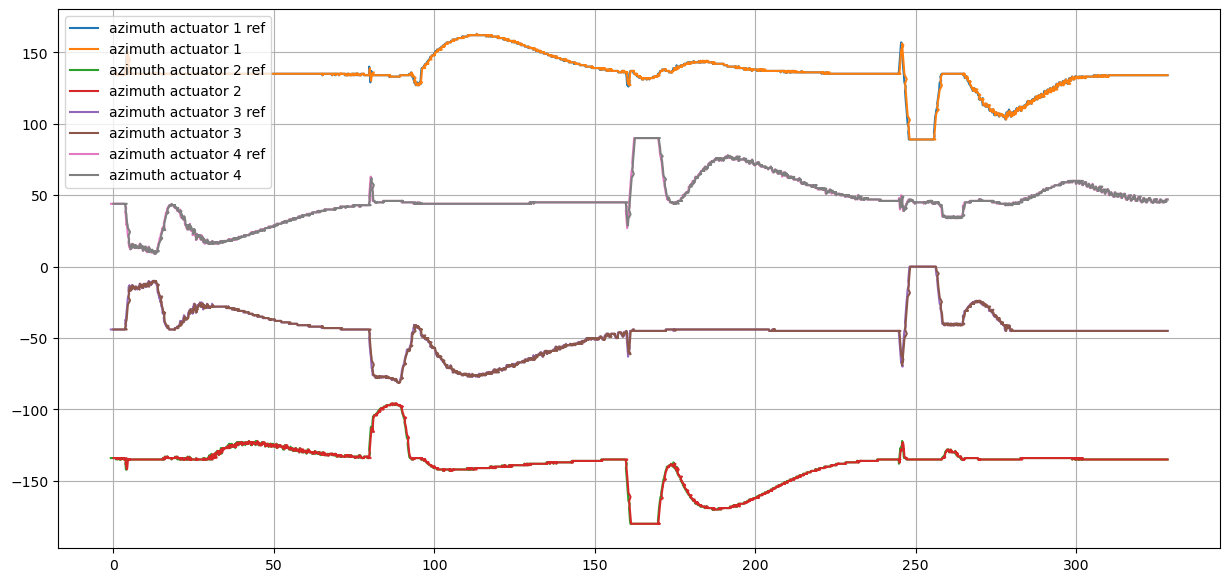

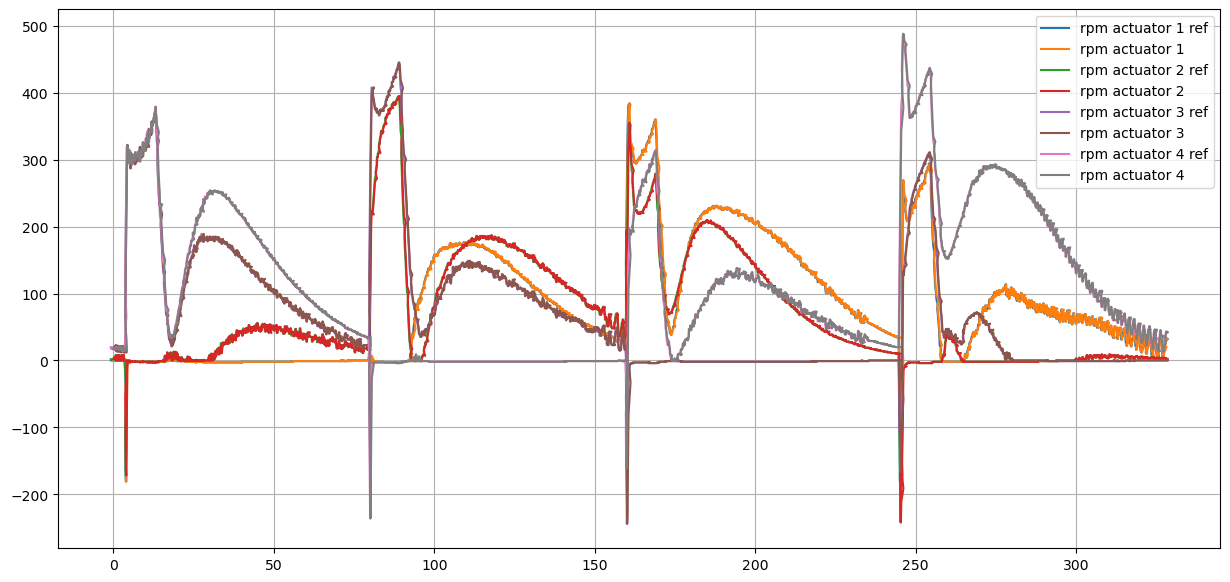

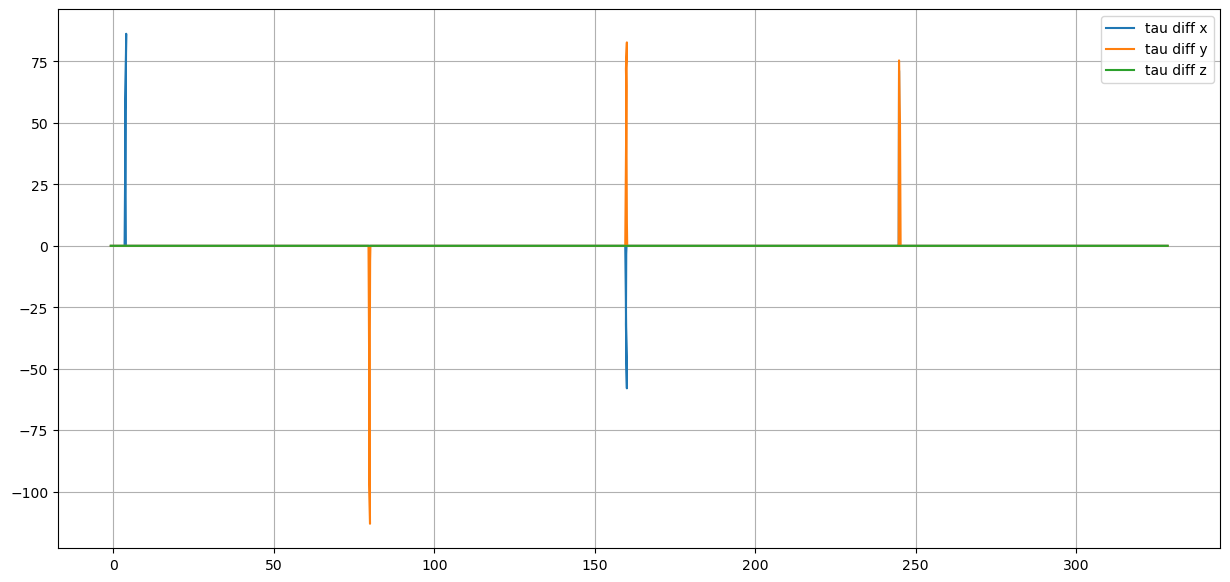

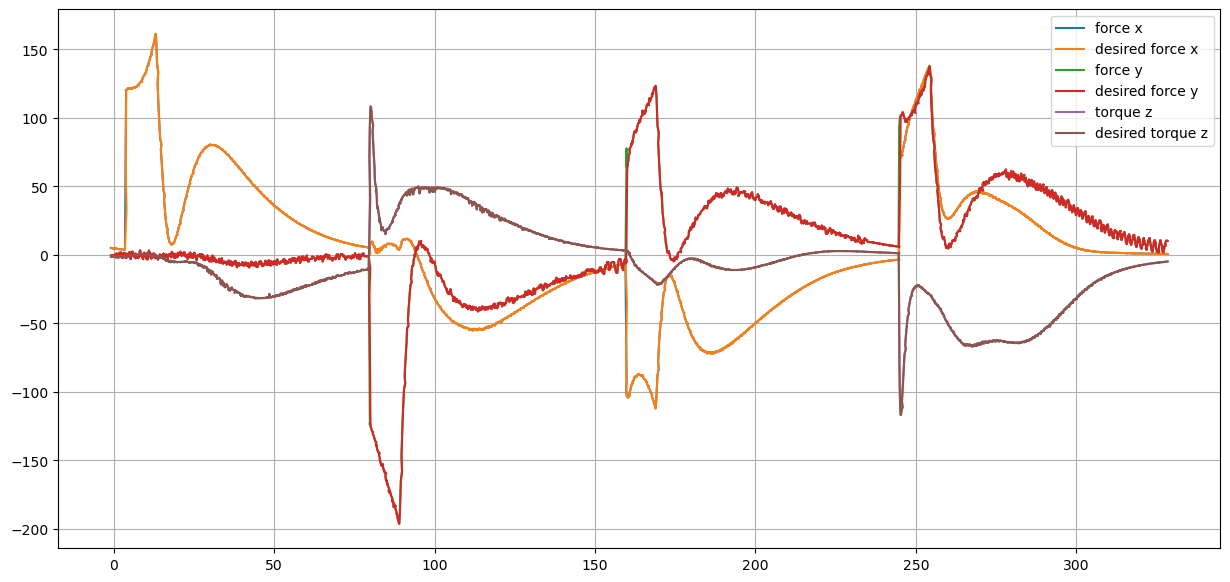

In [6]:
# Med w_angle = 1000, w_neg = 50, max_rate = 0.5, max_force_rate = 100
base_name = "nlp4"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

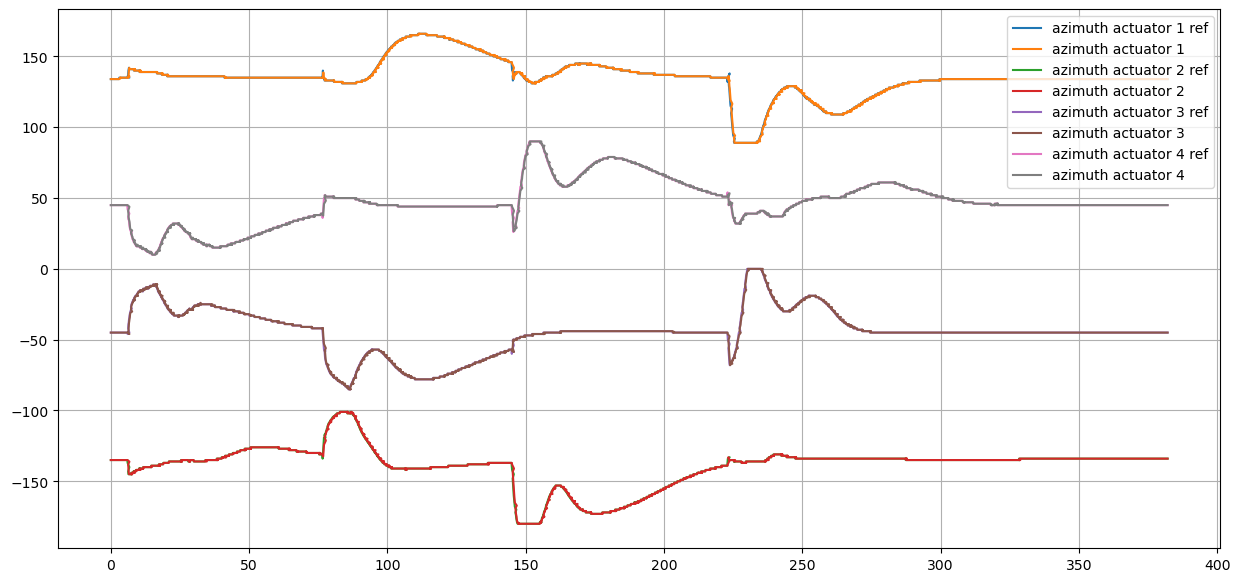

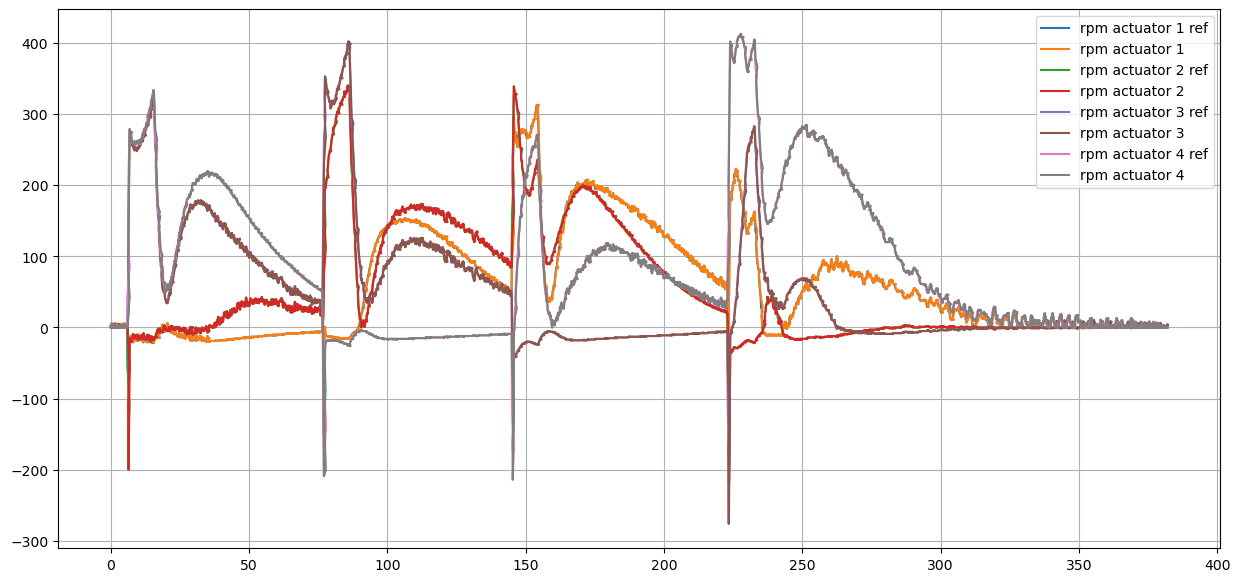

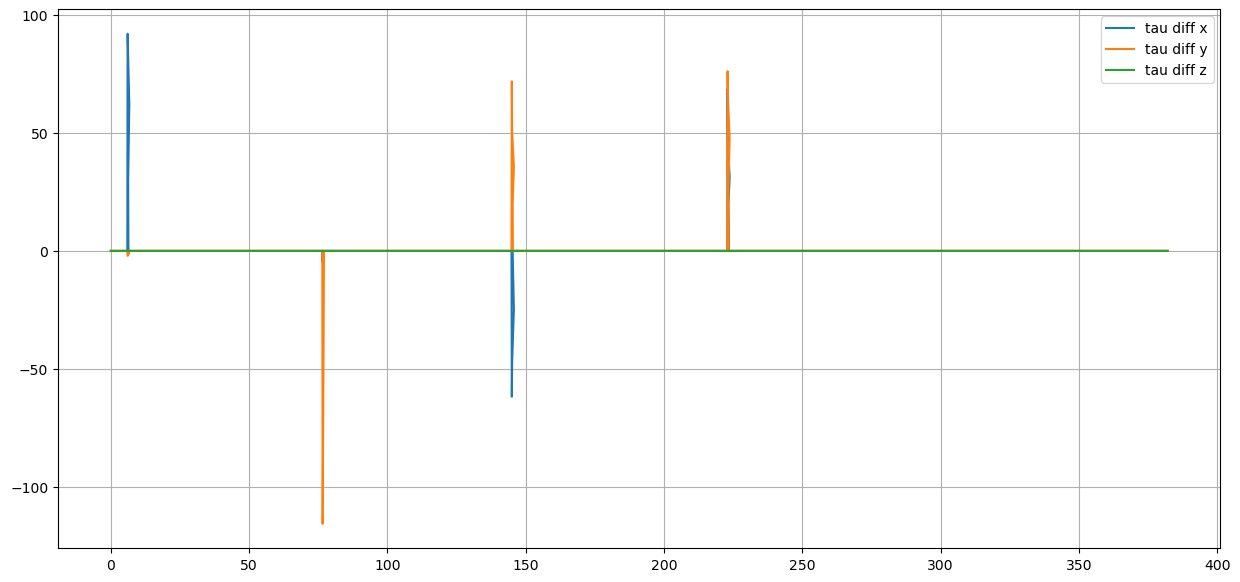

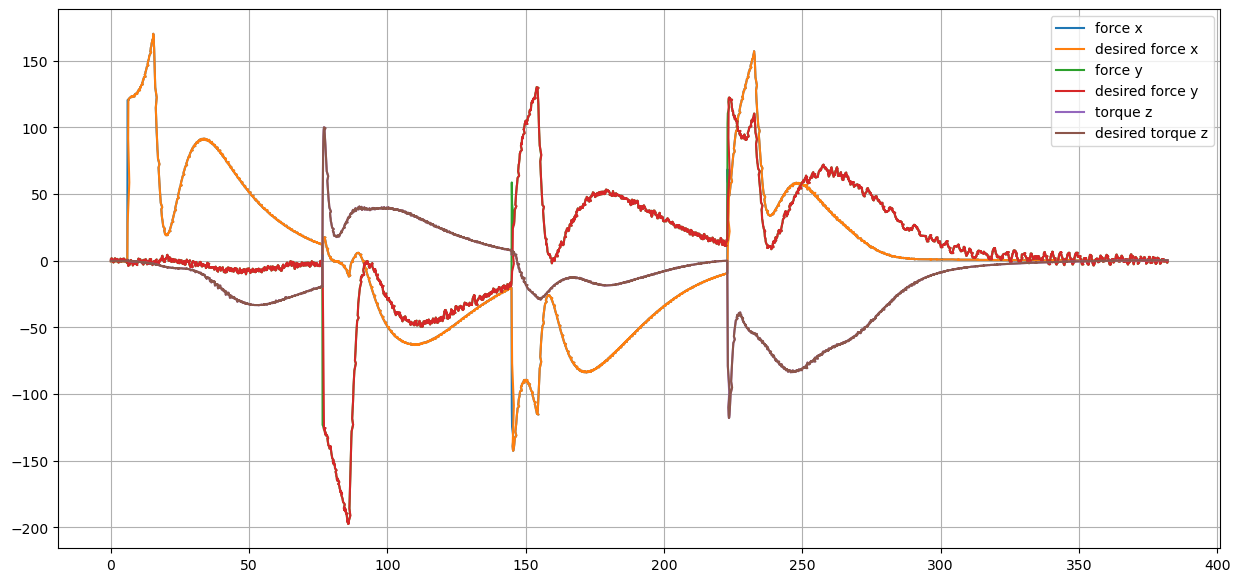

In [7]:
# Med w_angle = 1000, w_neg = 10, max_rate = 0.5, max_force_rate = 100, w_alpha_change = 50 000
base_name = "nlp5"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# QP

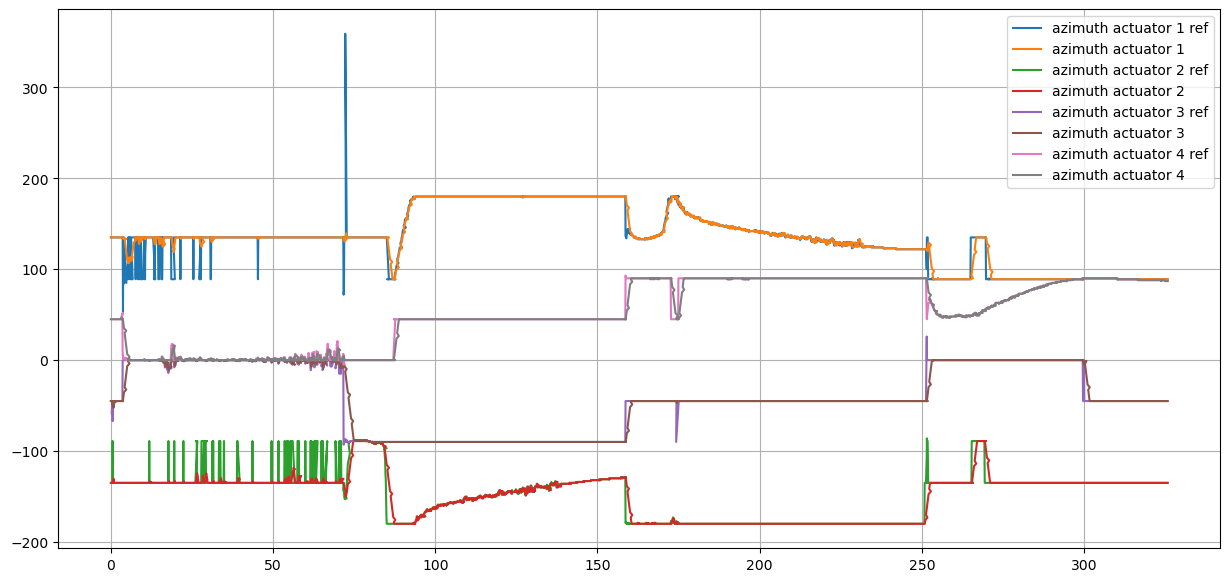

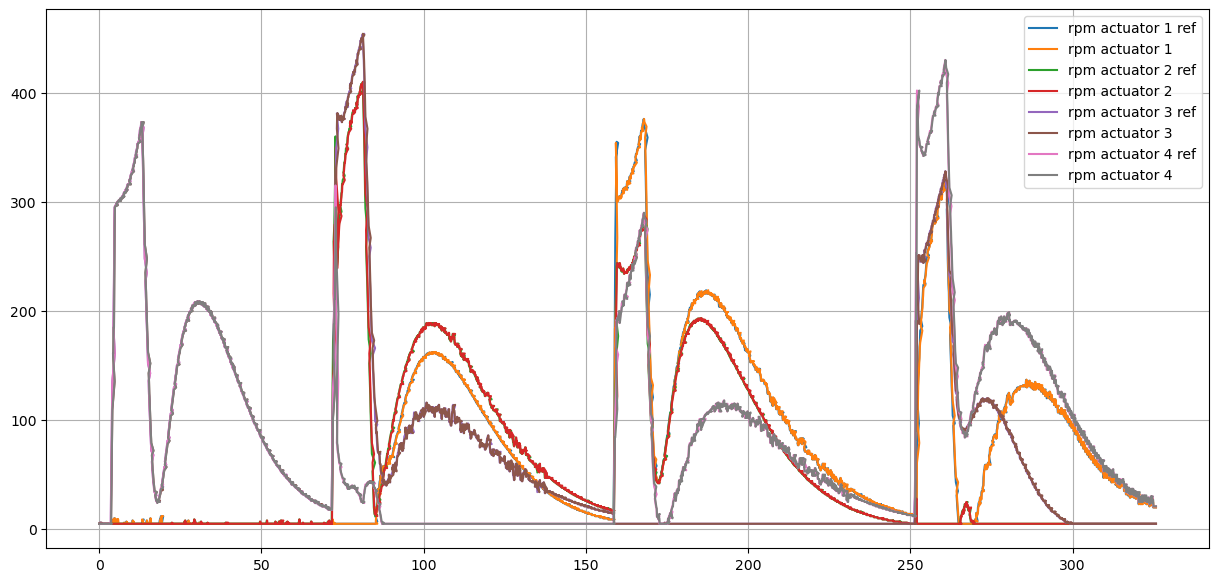

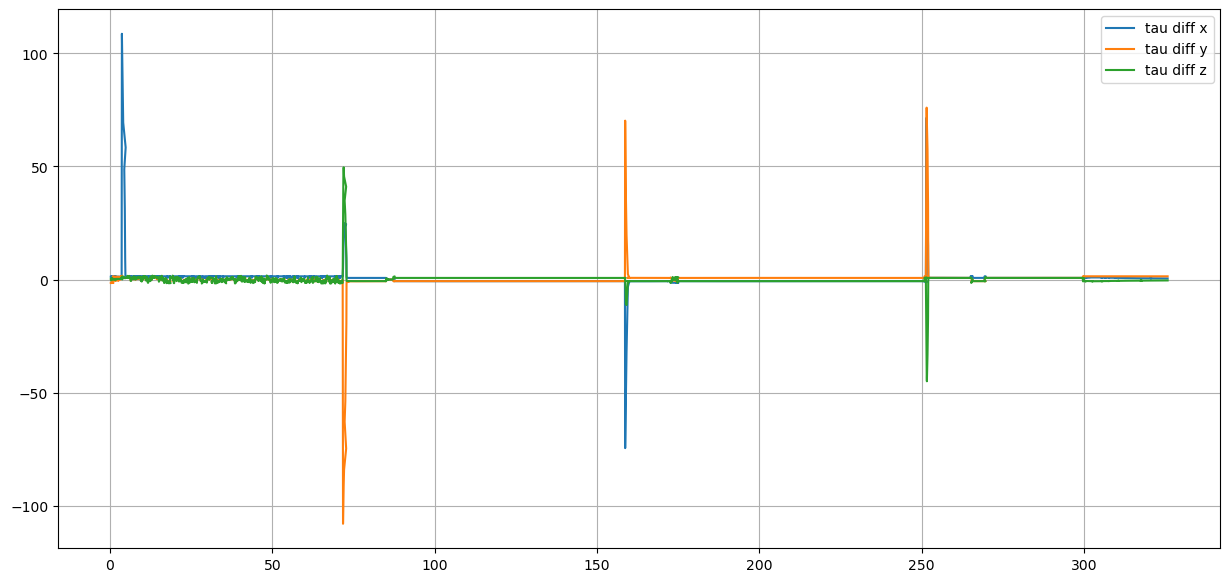

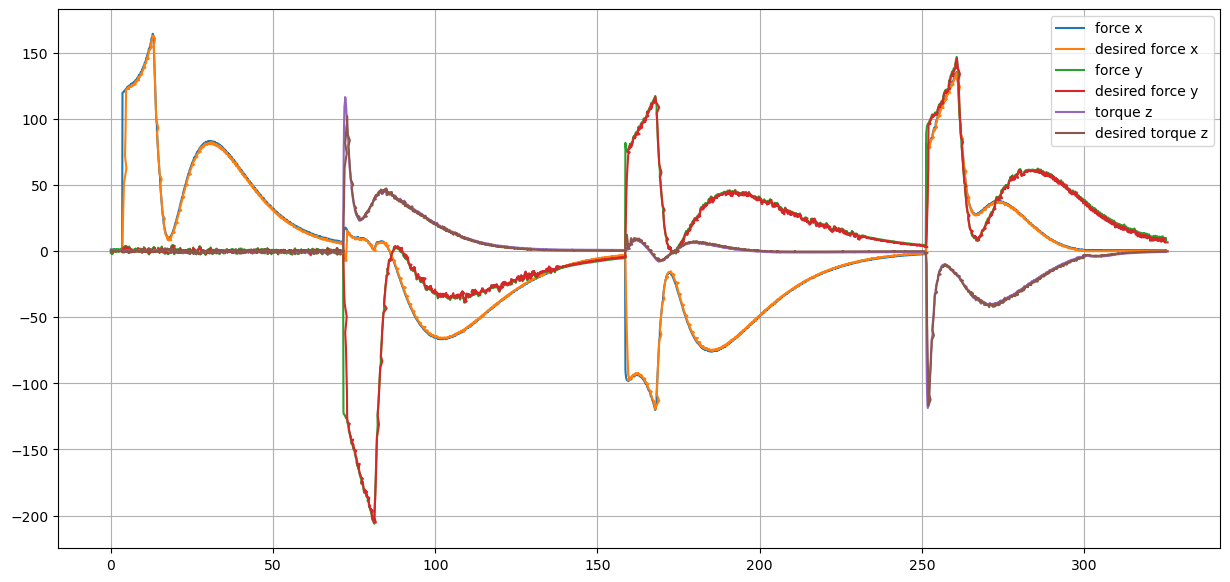

In [8]:
# Med max_rate = 1.0, max_force_rate = 50, W = 1, Q = 1000, beta = 1.1
base_name = "qp1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Maneuvering

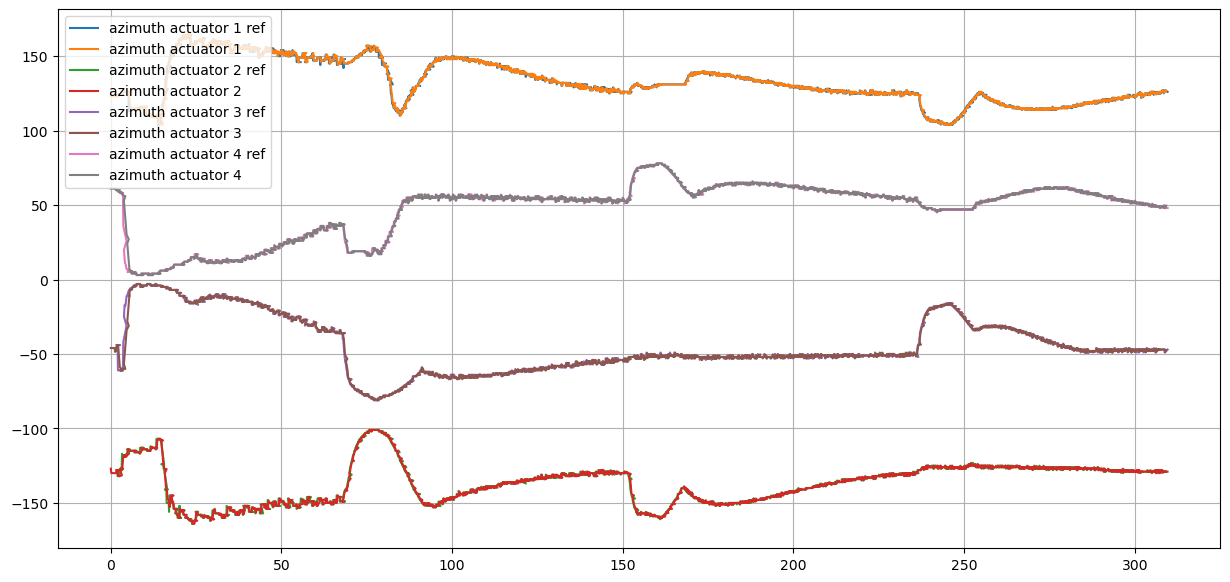

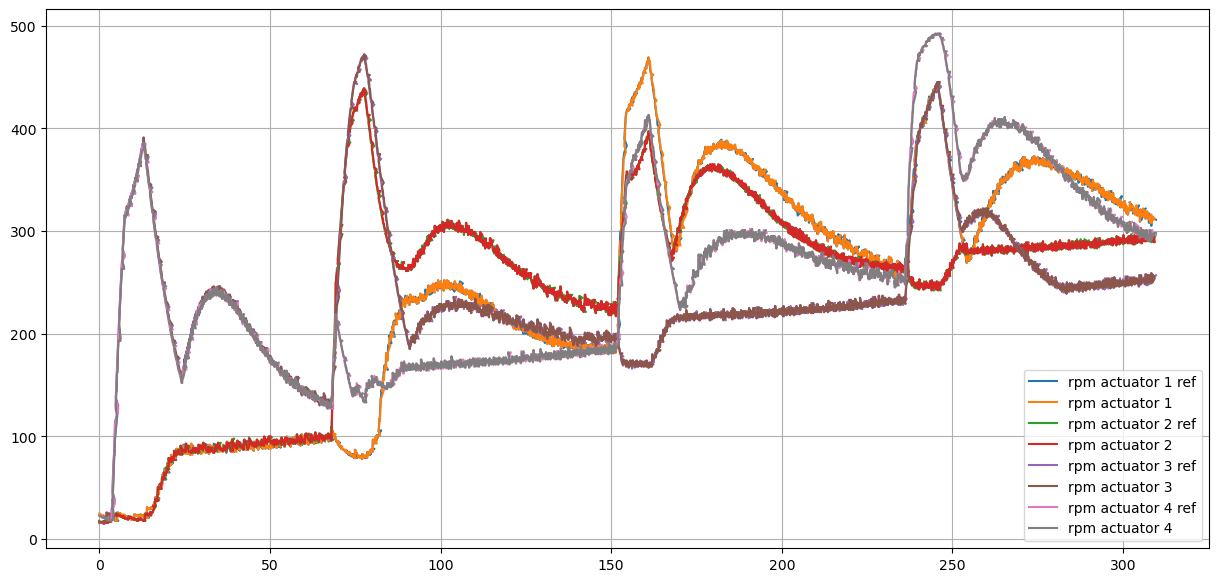

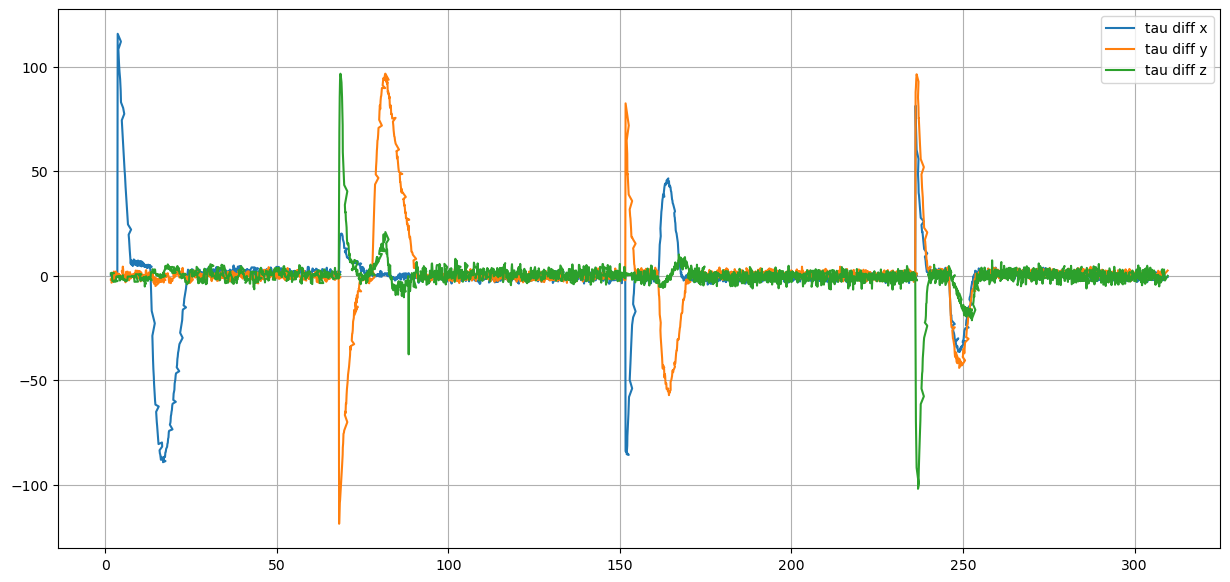

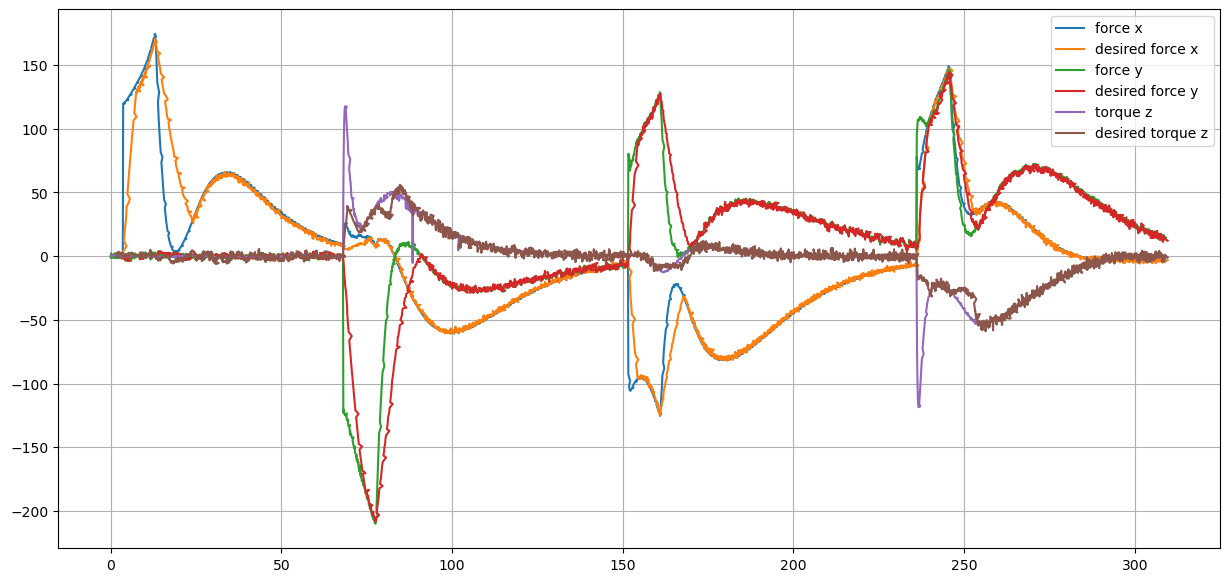

In [9]:
# Med mu = 0.1, gamma = 0.2, w = 1, rho = 0.1, zeta = 0.1, c = 1, lambda = 0.99
base_name = "maneuvering1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Physical test results

# NLP

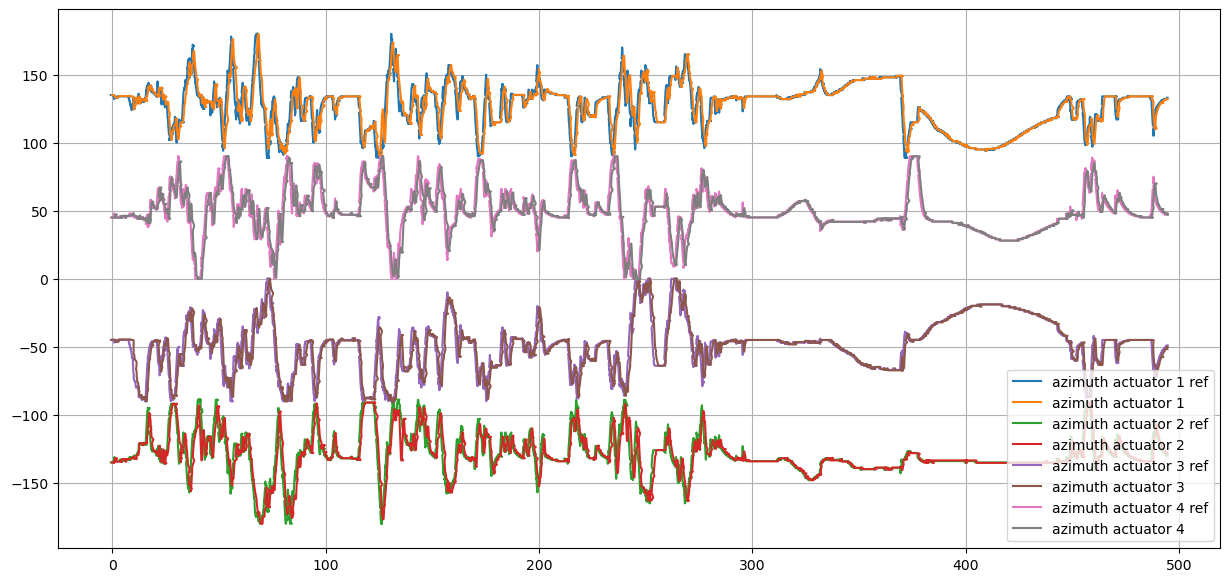

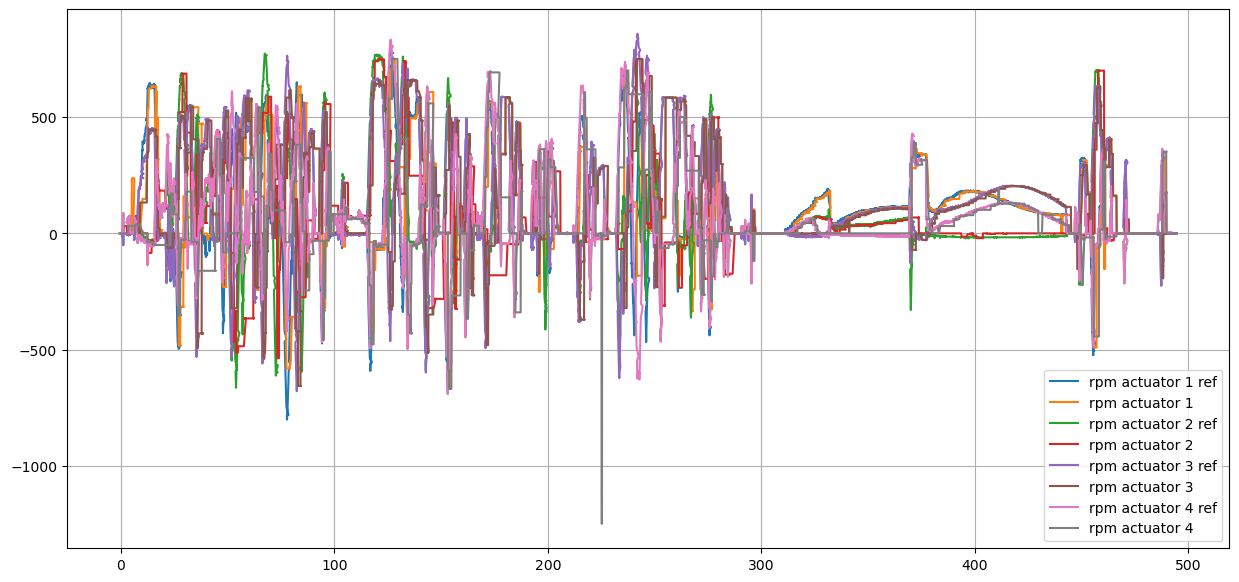

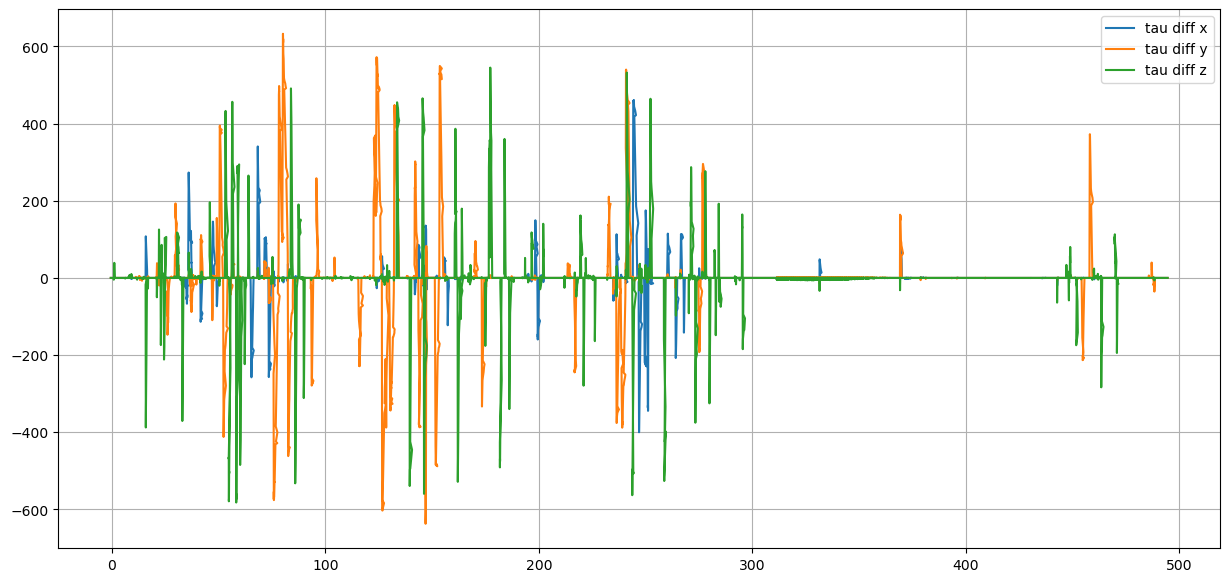

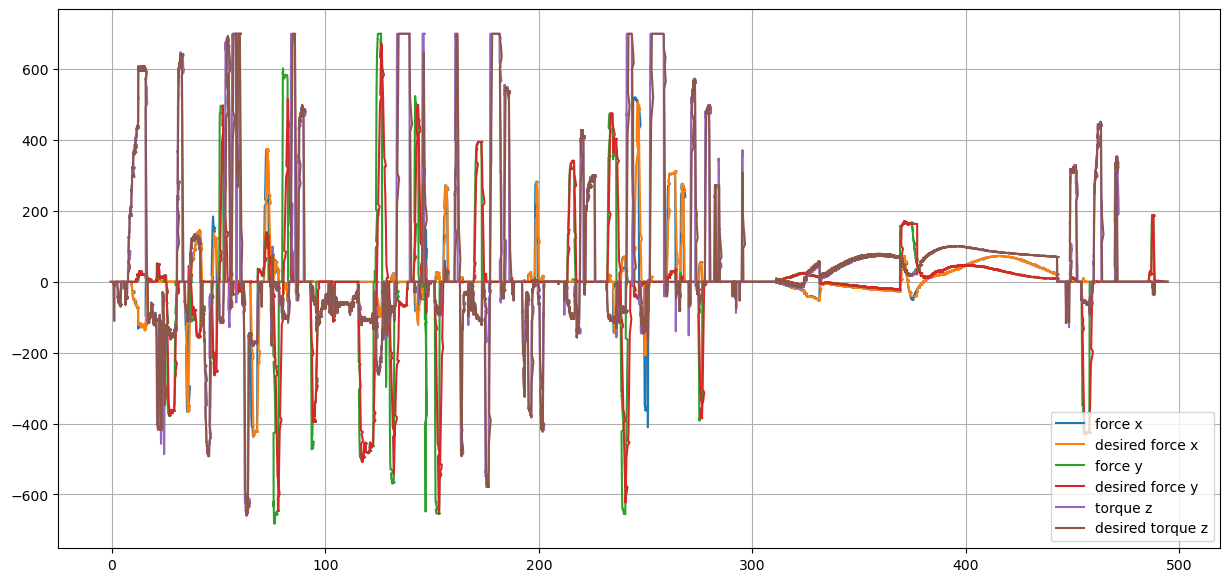

In [10]:
base_name = "nlp1"
data_path = f"physical_tests/{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Manuevering

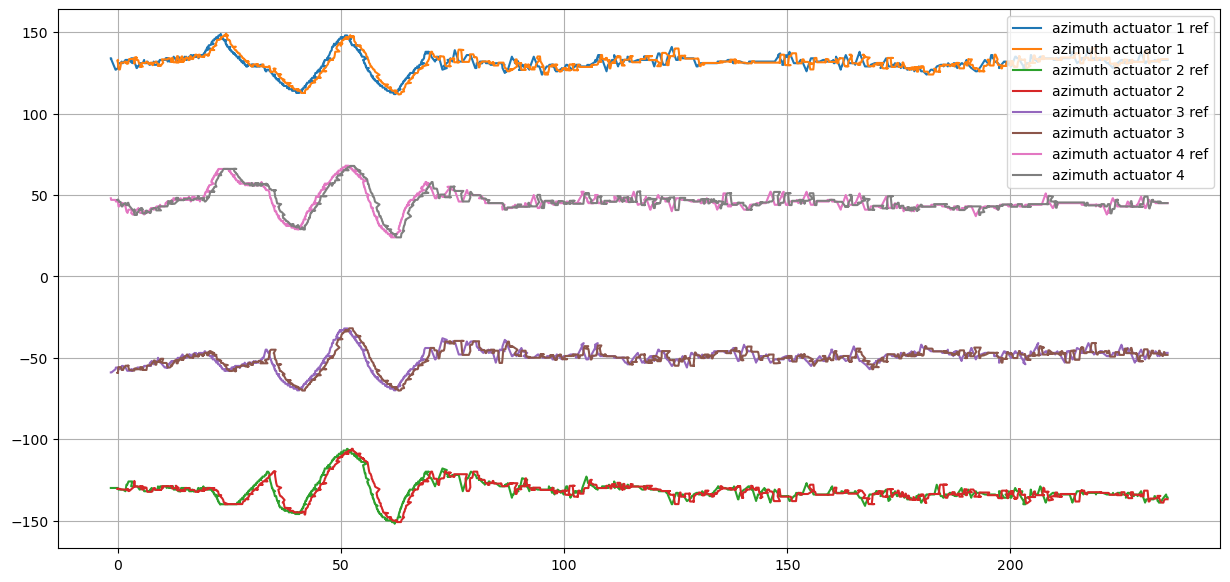

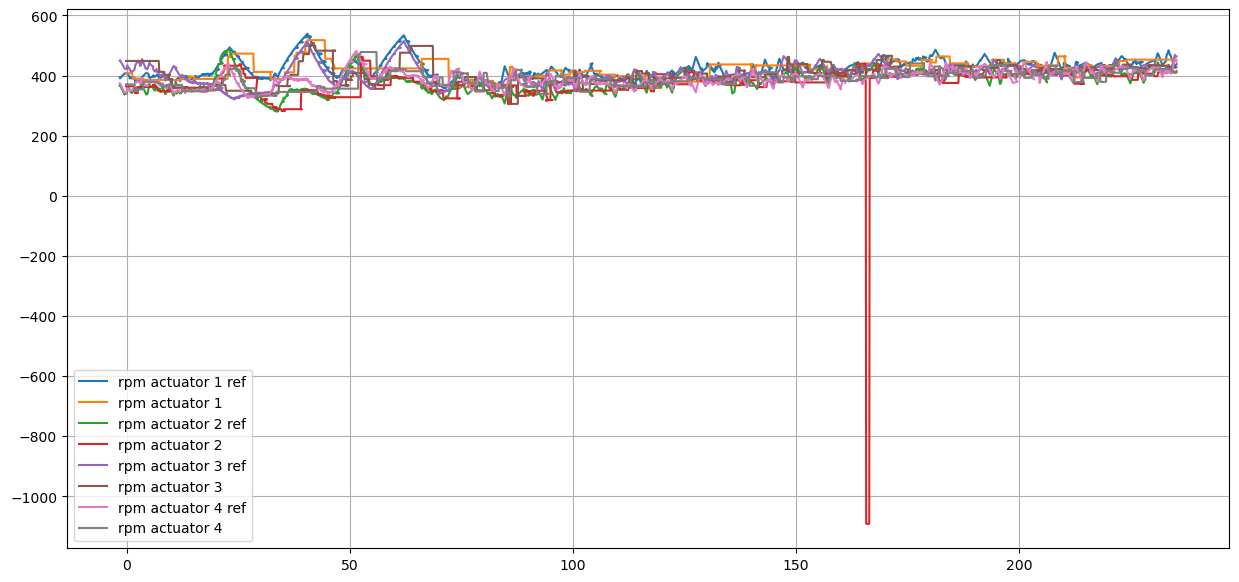

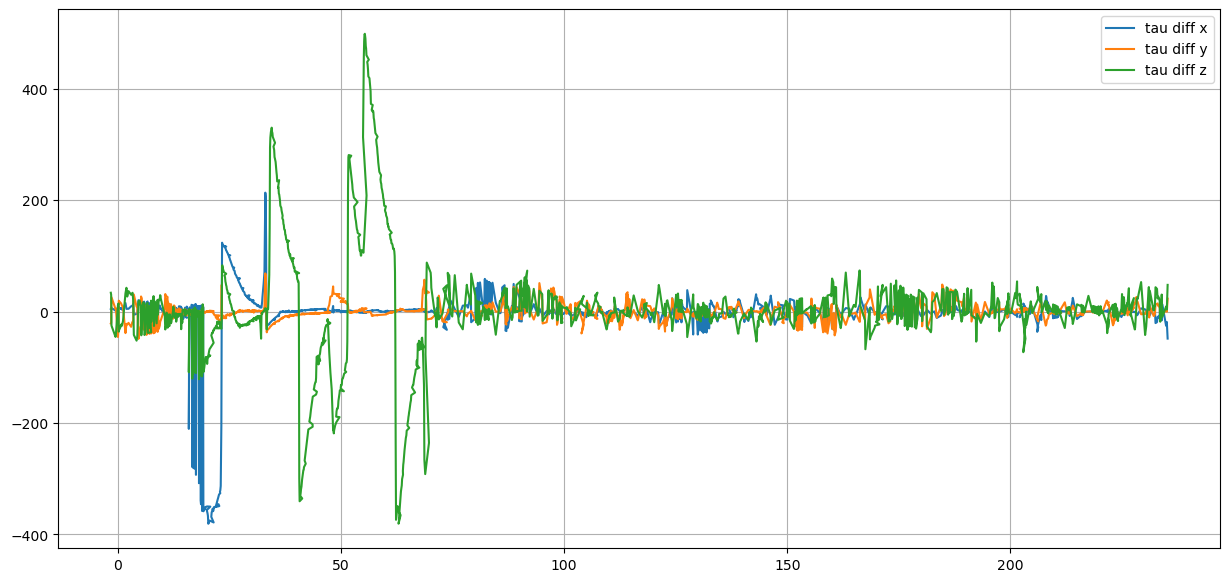

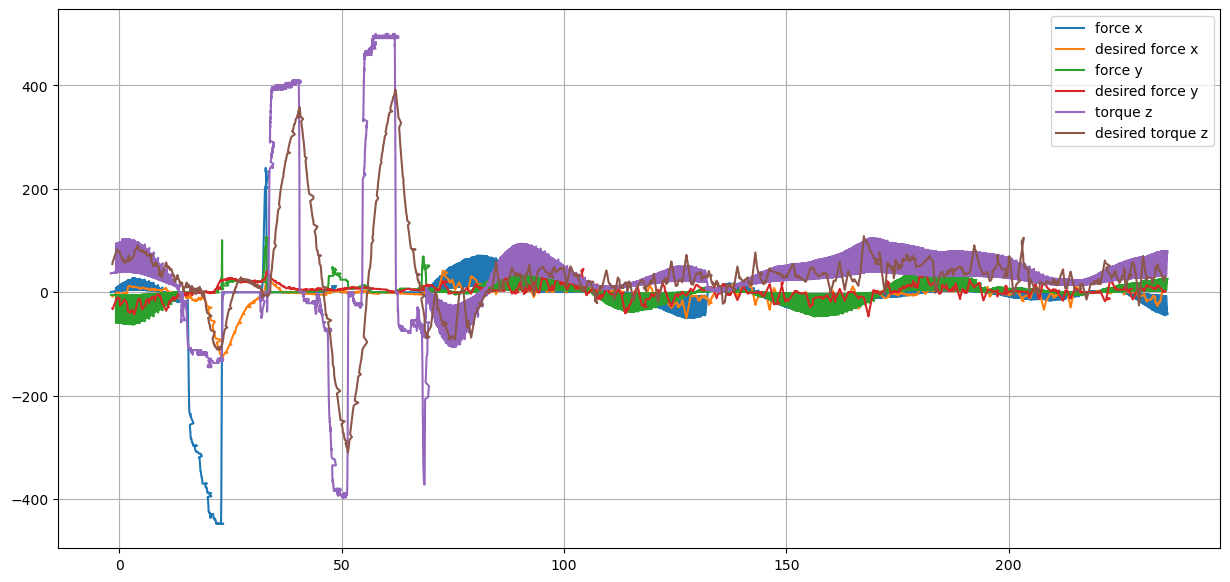

In [11]:
# Med mu = 0.1, gamma = 0.2, w = 1, rho = 0.1, zeta = 0.1, c = 1, lambda = 0.99
base_name = "maneuvering1"
data_path = f"physical_tests/{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure(figsize=(15, 7))
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Performance metrics

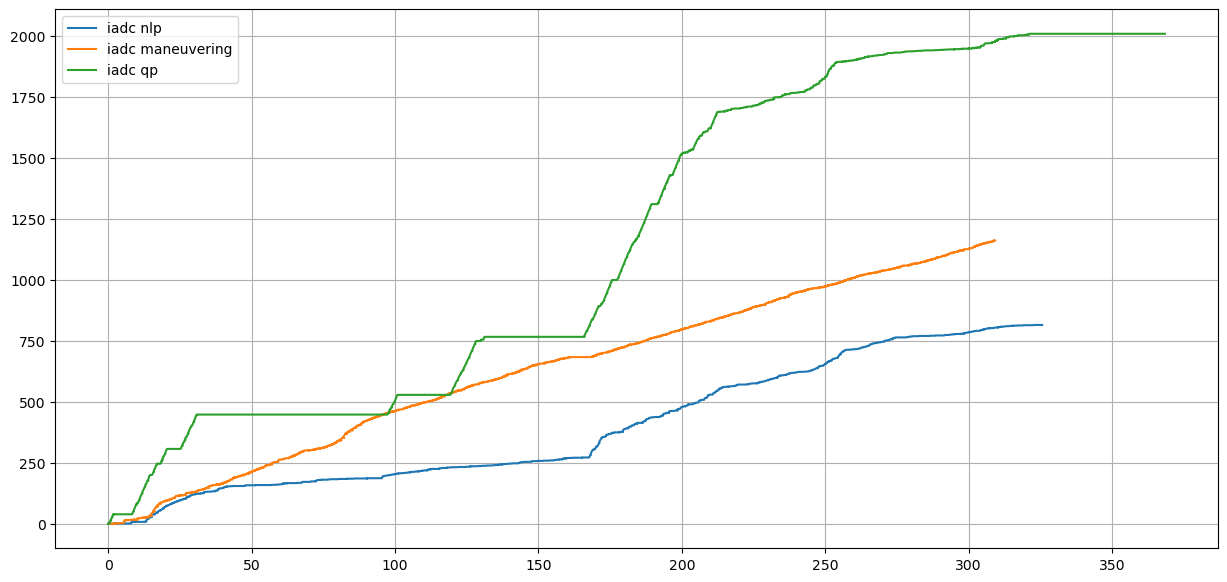

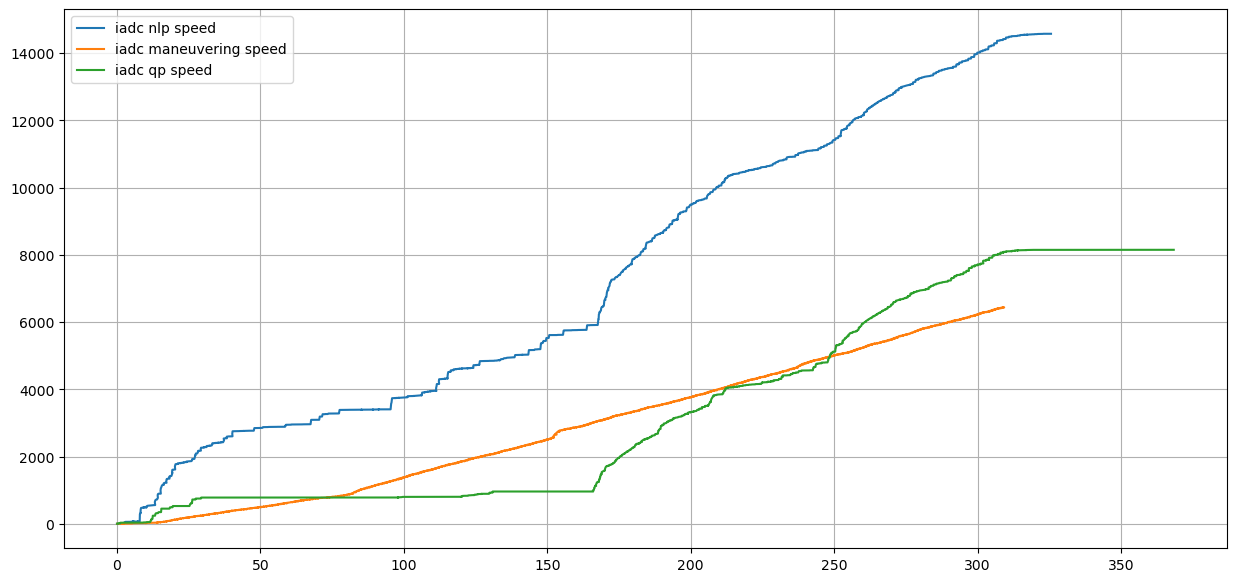

In [57]:
base_name = "nlp6"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

# Integral of the absolute differentiated control
iadc_sum1 = 0
iadc_nlp1 = np.zeros(len(azimuth_time[1]))
iadc_sum2 = 0
iadc_nlp2 = np.zeros(len(azimuth_time[2]))
iadc_sum3 = 0
iadc_nlp3 = np.zeros(len(azimuth_time[3]))
iadc_sum4 = 0
iadc_nlp4 = np.zeros(len(azimuth_time[4]))

iadc_sum_speed1 = 0
iadc_nlp_speed1 = np.zeros(len(motor_speed_time[1]))
iadc_sum_speed2 = 0
iadc_nlp_speed2 = np.zeros(len(motor_speed_time[2]))
iadc_sum_speed3 = 0
iadc_nlp_speed3 = np.zeros(len(motor_speed_time[3]))
iadc_sum_speed4 = 0
iadc_nlp_speed4 = np.zeros(len(motor_speed_time[4]))

timestep = 0.1

for i in range(1, len(azimuth_time[1])):
    alpha_dot = (azimuth_data[1]['data'].iloc[i] - azimuth_data[1]['data'].iloc[i-1]) / timestep
    iadc_sum1 += abs(alpha_dot) * timestep
    iadc_nlp1[i] = iadc_sum1

for i in range(1, len(azimuth_time[2])):
    alpha_dot = (azimuth_data[2]['data'].iloc[i] - azimuth_data[2]['data'].iloc[i-1]) / timestep
    iadc_sum2 += abs(alpha_dot) * timestep
    iadc_nlp2[i] = iadc_sum2

for i in range(1, len(azimuth_time[3])):
    alpha_dot = (azimuth_data[3]['data'].iloc[i] - azimuth_data[3]['data'].iloc[i-1]) / timestep
    iadc_sum3 += abs(alpha_dot) * timestep
    iadc_nlp3[i] = iadc_sum3

for i in range(1, len(azimuth_time[4])):
    alpha_dot = (azimuth_data[4]['data'].iloc[i] - azimuth_data[4]['data'].iloc[i-1]) / timestep
    iadc_sum4 += abs(alpha_dot) * timestep
    iadc_nlp4[i] = iadc_sum4

for i in range(1, len(motor_speed_time[1])):
    alpha_dot = (motor_speed_data[1]['motor_speed'].iloc[i] - motor_speed_data[1]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed1 += abs(alpha_dot) * timestep
    iadc_nlp_speed1[i] = iadc_sum_speed1

for i in range(1, len(motor_speed_time[2])):
    alpha_dot = (motor_speed_data[2]['motor_speed'].iloc[i] - motor_speed_data[2]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed2 += abs(alpha_dot) * timestep
    iadc_nlp_speed2[i] = iadc_sum_speed2

for i in range(1, len(motor_speed_time[3])):
    alpha_dot = (motor_speed_data[3]['motor_speed'].iloc[i] - motor_speed_data[3]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed3 += abs(alpha_dot) * timestep
    iadc_nlp_speed3[i] = iadc_sum_speed3

for i in range(1, len(motor_speed_time[4])):
    alpha_dot = (motor_speed_data[4]['motor_speed'].iloc[i] - motor_speed_data[4]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed4 += abs(alpha_dot) * timestep
    iadc_nlp_speed4[i] = iadc_sum_speed4

base_name = "maneuvering1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data_man = {}
azimuth_time_man = {}
motor_speed_data_man = {}
motor_speed_time_man = {}
actuator_ref_data_man = {}
actuator_ref_time_man = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data_man[1] = az_data
azimuth_time_man[1] = az_time
motor_speed_data_man[1] = rpm_data
motor_speed_time_man[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data_man[i] = az_data
        azimuth_time_man[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data_man[i] = rpm_data
        motor_speed_time_man[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data_man[i] = ref_data
    actuator_ref_time_man[i] = ref_time

# Integral of the absolute differentiated control
iadc_sum1 = 0
iadc_maneuvering1 = np.zeros(len(azimuth_time_man[1]))
iadc_sum2 = 0
iadc_maneuvering2 = np.zeros(len(azimuth_time_man[2]))
iadc_sum3 = 0
iadc_maneuvering3 = np.zeros(len(azimuth_time_man[3]))
iadc_sum4 = 0
iadc_maneuvering4 = np.zeros(len(azimuth_time_man[4]))
iadc_sum_speed1 = 0
iadc_maneuvering_speed1 = np.zeros(len(motor_speed_time_man[1]))
iadc_sum_speed2 = 0
iadc_maneuvering_speed2 = np.zeros(len(motor_speed_time_man[2]))
iadc_sum_speed3 = 0
iadc_maneuvering_speed3 = np.zeros(len(motor_speed_time_man[3]))
iadc_sum_speed4 = 0
iadc_maneuvering_speed4 = np.zeros(len(motor_speed_time_man[4]))
timestep = 0.1
for i in range(1, len(azimuth_time_man[1])):
    alpha_dot = (azimuth_data_man[1]['data'].iloc[i] - azimuth_data_man[1]['data'].iloc[i-1]) / timestep
    iadc_sum1 += abs(alpha_dot) * timestep
    iadc_maneuvering1[i] = iadc_sum1

for i in range(1, len(azimuth_time_man[2])):
    alpha_dot = (azimuth_data_man[2]['data'].iloc[i] - azimuth_data[2]['data'].iloc[i-1]) / timestep
    iadc_sum2 += abs(alpha_dot) * timestep
    iadc_maneuvering2[i] = iadc_sum2

for i in range(1, len(azimuth_time_man[3])):
    alpha_dot = (azimuth_data_man[3]['data'].iloc[i] - azimuth_data_man[3]['data'].iloc[i-1]) / timestep
    iadc_sum3 += abs(alpha_dot) * timestep
    iadc_maneuvering3[i] = iadc_sum3

for i in range(1, len(azimuth_time_man[4])):
    alpha_dot = (azimuth_data_man[4]['data'].iloc[i] - azimuth_data_man[4]['data'].iloc[i-1]) / timestep
    iadc_sum4 += abs(alpha_dot) * timestep
    iadc_maneuvering4[i] = iadc_sum4

for i in range(1, len(motor_speed_time_man[1])):
    alpha_dot = (motor_speed_data_man[1]['motor_speed'].iloc[i] - motor_speed_data_man[1]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed1 += abs(alpha_dot) * timestep
    iadc_maneuvering_speed1[i] = iadc_sum_speed1

for i in range(1, len(motor_speed_time_man[2])):
    alpha_dot = (motor_speed_data_man[2]['motor_speed'].iloc[i] - motor_speed_data_man[2]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed2 += abs(alpha_dot) * timestep
    iadc_maneuvering_speed2[i] = iadc_sum_speed2

for i in range(1, len(motor_speed_time_man[3])):
    alpha_dot = (motor_speed_data_man[3]['motor_speed'].iloc[i] - motor_speed_data_man[3]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed3 += abs(alpha_dot) * timestep
    iadc_maneuvering_speed3[i] = iadc_sum_speed3

for i in range(1, len(motor_speed_time_man[4])):
    alpha_dot = (motor_speed_data_man[4]['motor_speed'].iloc[i] - motor_speed_data_man[4]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed4 += abs(alpha_dot) * timestep
    iadc_maneuvering_speed4[i] = iadc_sum_speed4

base_name = "qp2"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data_qp = {}
azimuth_time_qp = {}
motor_speed_data_qp = {}
motor_speed_time_qp = {}
actuator_ref_data_qp = {}
actuator_ref_time_qp = {}
az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data_qp[1] = az_data
azimuth_time_qp[1] = az_time
motor_speed_data_qp[1] = rpm_data
motor_speed_time_qp[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data_qp[i] = az_data
        azimuth_time_qp[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data_qp[i] = rpm_data
        motor_speed_time_qp[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data_qp[i] = ref_data
    actuator_ref_time_qp[i] = ref_time

# Integral of the absolute differentiated control
iadc_sum1 = 0
iadc_qp1 = np.zeros(len(azimuth_time_qp[1]))
iadc_sum2 = 0
iadc_qp2 = np.zeros(len(azimuth_time_qp[2]))
iadc_sum3 = 0
iadc_qp3 = np.zeros(len(azimuth_time_qp[3]))
iadc_sum4 = 0
iadc_qp4 = np.zeros(len(azimuth_time_qp[4]))
iadc_sum_speed1 = 0
iadc_qp_speed1 = np.zeros(len(motor_speed_time_qp[1]))
iadc_sum_speed2 = 0
iadc_qp_speed2 = np.zeros(len(motor_speed_time_qp[2]))
iadc_sum_speed3 = 0
iadc_qp_speed3 = np.zeros(len(motor_speed_time_qp[3]))
iadc_sum_speed4 = 0
iadc_qp_speed4 = np.zeros(len(motor_speed_time_qp[4]))

timestep = 0.1
for i in range(1, len(azimuth_time_qp[1])):
    alpha_dot = (azimuth_data_qp[1]['data'].iloc[i] - azimuth_data_qp[1]['data'].iloc[i-1]) / timestep
    iadc_sum1 += abs(alpha_dot) * timestep
    iadc_qp1[i] = iadc_sum1

for i in range(1, len(azimuth_time_qp[2])):
    alpha_dot = (azimuth_data_qp[2]['data'].iloc[i] - azimuth_data_qp[2]['data'].iloc[i-1]) / timestep
    iadc_sum2 += abs(alpha_dot) * timestep
    iadc_qp2[i] = iadc_sum2

for i in range(1, len(azimuth_time_qp[3])):
    alpha_dot = (azimuth_data_qp[3]['data'].iloc[i] - azimuth_data_qp[3]['data'].iloc[i-1]) / timestep
    iadc_sum3 += abs(alpha_dot) * timestep
    iadc_qp3[i] = iadc_sum3

for i in range(1, len(azimuth_time_qp[4])):
    alpha_dot = (azimuth_data_qp[4]['data'].iloc[i] - azimuth_data_qp[4]['data'].iloc[i-1]) / timestep
    iadc_sum4 += abs(alpha_dot) * timestep
    iadc_qp4[i] = iadc_sum4

for i in range(1, len(motor_speed_time_qp[1])):
    alpha_dot = (motor_speed_data_qp[1]['motor_speed'].iloc[i] - motor_speed_data_qp[1]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed1 += abs(alpha_dot) * timestep
    iadc_qp_speed1[i] = iadc_sum_speed1

for i in range(1, len(motor_speed_time_qp[2])):
    alpha_dot = (motor_speed_data_qp[2]['motor_speed'].iloc[i] - motor_speed_data_qp[2]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed2 += abs(alpha_dot) * timestep
    iadc_qp_speed2[i] = iadc_sum_speed2

for i in range(1, len(motor_speed_time_qp[3])):
    alpha_dot = (motor_speed_data_qp[3]['motor_speed'].iloc[i] - motor_speed_data_qp[3]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed3 += abs(alpha_dot) * timestep
    iadc_qp_speed3[i] = iadc_sum_speed3

for i in range(1, len(motor_speed_time_qp[4])):
    alpha_dot = (motor_speed_data_qp[4]['motor_speed'].iloc[i] - motor_speed_data_qp[4]['motor_speed'].iloc[i-1]) / timestep
    iadc_sum_speed4 += abs(alpha_dot) * timestep
    iadc_qp_speed4[i] = iadc_sum_speed4

plt.figure(figsize=(15, 7))
plt.plot(azimuth_time[1].to_numpy(), iadc_nlp1, label=f'iadc nlp')
# plt.plot(azimuth_time[2].to_numpy(), iadc_nlp2, label=f'iadc nlp2')
# plt.plot(azimuth_time[3].to_numpy(), iadc_nlp3, label=f'iadc nlp3')
# plt.plot(azimuth_time[4].to_numpy(), iadc_nlp4, label=f'iadc nlp4')
plt.plot(azimuth_time_man[1].to_numpy(), iadc_maneuvering1, label=f'iadc maneuvering')
plt.plot(azimuth_time_qp[1].to_numpy(), iadc_qp1, label=f'iadc qp')
plt.legend()
plt.grid()

plt.figure(figsize=(15, 7))
plt.plot(motor_speed_time[1].to_numpy(), iadc_nlp_speed1, label=f'iadc nlp speed')
# plt.plot(motor_speed_time[2].to_numpy(), iadc_nlp_speed2, label=f'iadc nlp speed2')
# plt.plot(motor_speed_time[3].to_numpy(), iadc_nlp_speed3, label=f'iadc nlp speed3')
# plt.plot(motor_speed_time[4].to_numpy(), iadc_nlp_speed4, label=f'iadc nlp speed4')
plt.plot(motor_speed_time_man[1].to_numpy(), iadc_maneuvering_speed1, label=f'iadc maneuvering speed')
plt.plot(motor_speed_time_qp[1].to_numpy(), iadc_qp_speed1, label=f'iadc qp speed')
plt.legend()
plt.grid()
plt.show()

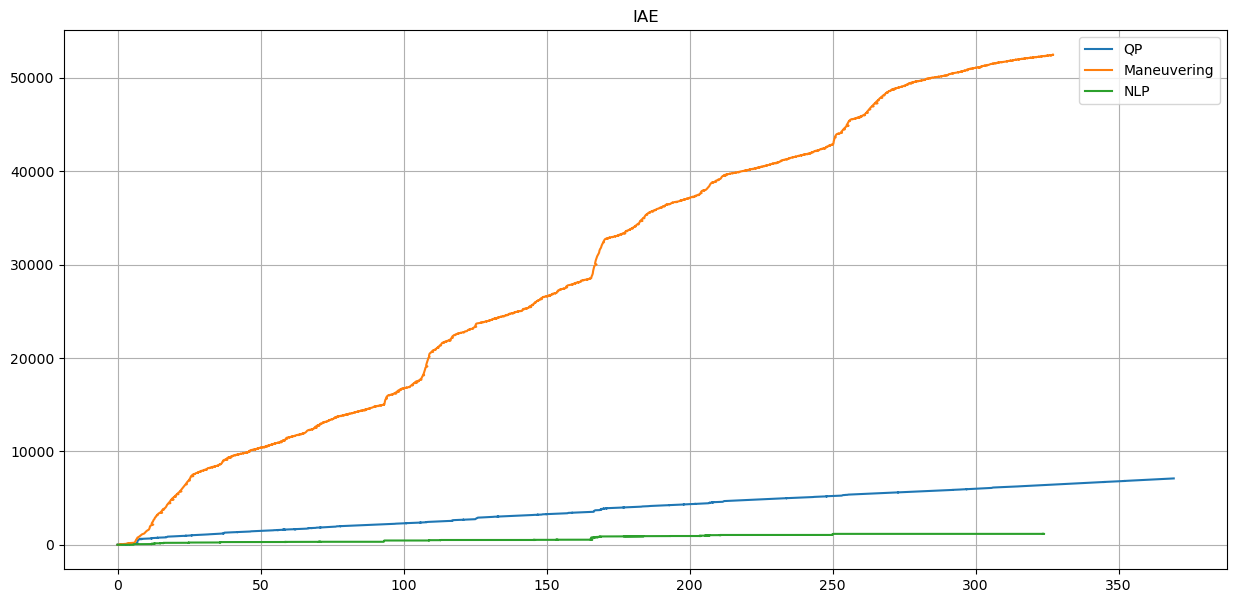

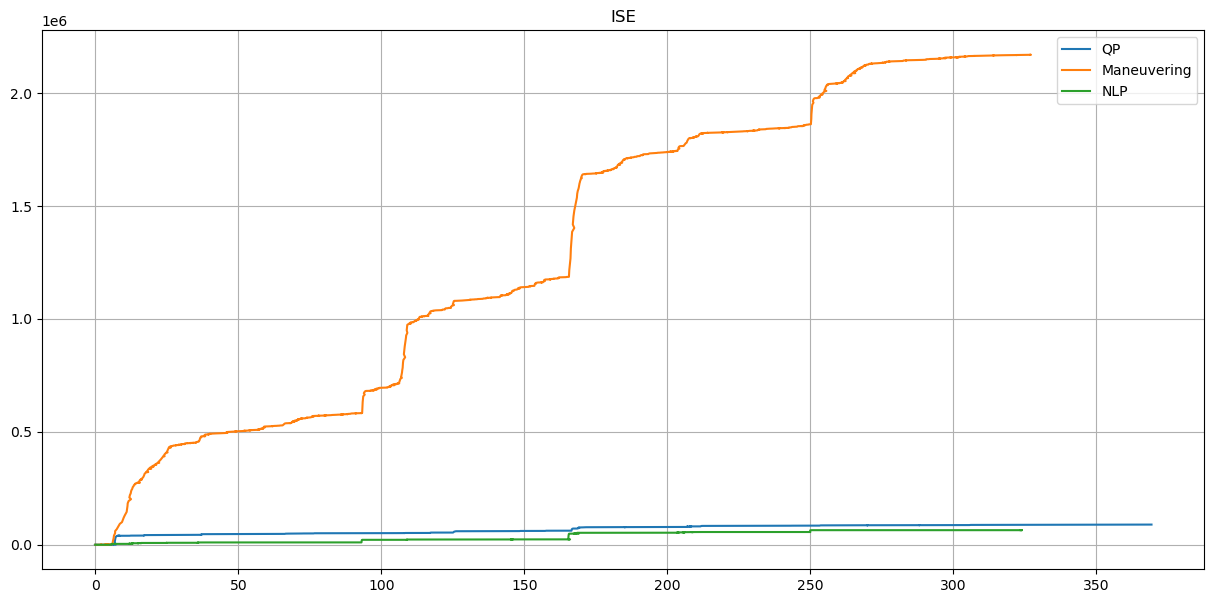

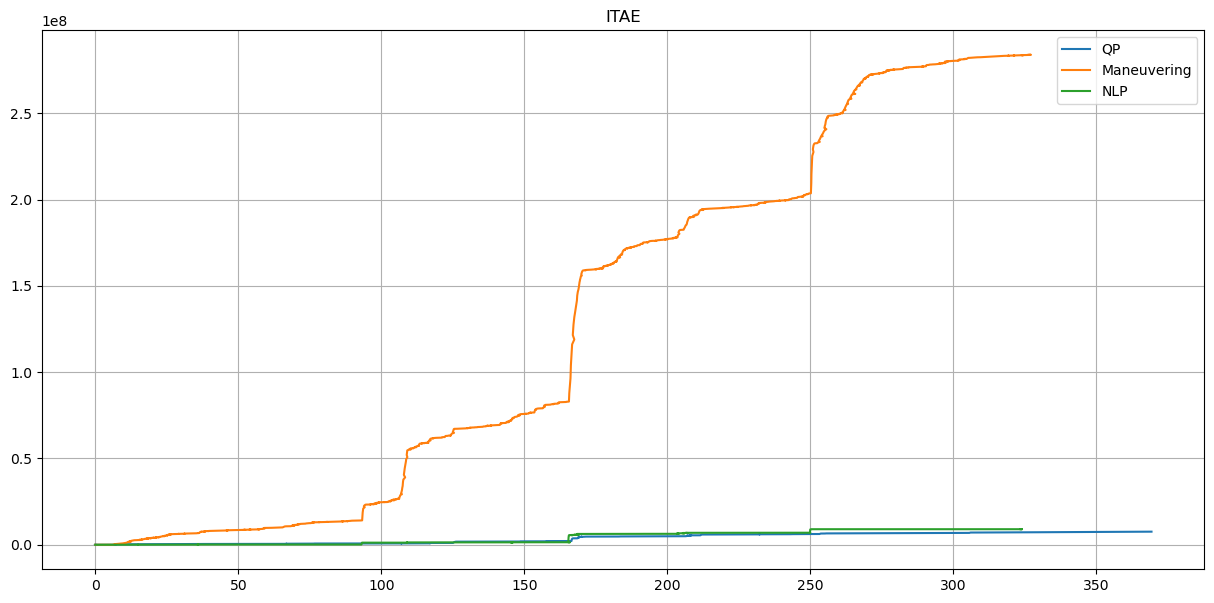

In [59]:
# tau_diff_qp = pd.read_csv('qp_test2/qp-test/tau_diff.csv')
# tau_diff_qp = pd.read_csv('physical_tests/qp1/qp1/tau_diff.csv')
tau_diff_qp = pd.read_csv('qp2/qp2/tau_diff.csv')
base_time_qp = pd.to_datetime(tau_diff_qp['time'][0])
tau_diff_qp_time = pd.to_datetime(tau_diff_qp['time'])
tau_diff_qp_time = (tau_diff_qp_time - base_time_qp).dt.total_seconds()
tau_diff_qp_x = tau_diff_qp['wrench_force_x']
tau_diff_qp_y = tau_diff_qp['wrench_force_y']
tau_diff_qp_z = tau_diff_qp['wrench_torque_z']

# tau_diff_maneuvering = pd.read_csv('maneuvering1/maneuvering1/tau_diff.csv')
# tau_diff_maneuvering = pd.read_csv('physical_tests/maneuvering1/maneuvering1/tau_diff.csv')
tau_diff_maneuvering = pd.read_csv('maneuvering2/maneuvering2/tau_diff.csv')
base_time_maneuvering = pd.to_datetime(tau_diff_maneuvering['time'][0])
tau_diff_maneuvering_time = pd.to_datetime(tau_diff_maneuvering['time'])
tau_diff_maneuvering_time = (tau_diff_maneuvering_time - base_time_maneuvering).dt.total_seconds()
tau_diff_maneuvering_x = tau_diff_maneuvering['wrench_force_x']
tau_diff_maneuvering_y = tau_diff_maneuvering['wrench_force_y']
tau_diff_maneuvering_z = tau_diff_maneuvering['wrench_torque_z']

# tau_diff_nlp = pd.read_csv('physical_tests/nlp1/nlp1/tau_diff.csv')
tau_diff_nlp = pd.read_csv('nlp6/nlp6/tau_diff.csv')
base_time_nlp = pd.to_datetime(tau_diff_nlp['time'][0])
tau_diff_nlp_time = pd.to_datetime(tau_diff_nlp['time'])
tau_diff_nlp_time = (tau_diff_nlp_time - base_time_nlp).dt.total_seconds()
tau_diff_nlp_x = tau_diff_nlp['wrench_force_x']
tau_diff_nlp_y = tau_diff_nlp['wrench_force_y']
tau_diff_nlp_z = tau_diff_nlp['wrench_torque_z']

tau_diff_pseudo_inverse = pd.read_csv('pseudo_inverse1/pseudo_inverse1/tau_diff.csv')
base_time_pseudo_inverse = pd.to_datetime(tau_diff_pseudo_inverse['time'][0])
tau_diff_pseudo_inverse_time = pd.to_datetime(tau_diff_pseudo_inverse['time'])
tau_diff_pseudo_inverse_time = (tau_diff_pseudo_inverse_time - base_time_pseudo_inverse).dt.total_seconds()
tau_diff_pseudo_inverse_x = tau_diff_pseudo_inverse['wrench_force_x']
tau_diff_pseudo_inverse_y = tau_diff_pseudo_inverse['wrench_force_y']
tau_diff_pseudo_inverse_z = tau_diff_pseudo_inverse['wrench_torque_z']


iae_qp = np.zeros(len(tau_diff_qp_time))
iae_sum = 0
for i in range(len(tau_diff_qp_time)):
    iae_sum += np.sqrt(tau_diff_qp_x[i]**2 + tau_diff_qp_y[i]**2 + tau_diff_qp_z[i]**2)
    iae_qp[i] = iae_sum

iae_maneuvering = np.zeros(len(tau_diff_maneuvering_time))
iae_sum_maneuvering = 0
for i in range(len(tau_diff_maneuvering_time)):
    iae_sum_maneuvering += np.sqrt(tau_diff_maneuvering_x[i]**2 + tau_diff_maneuvering_y[i]**2 + tau_diff_maneuvering_z[i]**2)
    iae_maneuvering[i] = iae_sum_maneuvering

iae_nlp = np.zeros(len(tau_diff_nlp_time))
iae_sum_nlp = 0
for i in range(len(tau_diff_nlp_time)):
    iae_sum_nlp += np.sqrt(tau_diff_nlp_x[i]**2 + tau_diff_nlp_y[i]**2 + tau_diff_nlp_z[i]**2)
    iae_nlp[i] = iae_sum_nlp

iae_pseudo_inverse = np.zeros(len(tau_diff_pseudo_inverse_time))
iae_sum_pseudo_inverse = 0
for i in range(len(tau_diff_pseudo_inverse_time)):
    iae_sum_pseudo_inverse += np.sqrt(tau_diff_pseudo_inverse_x[i]**2 + tau_diff_pseudo_inverse_y[i]**2 + tau_diff_pseudo_inverse_z[i]**2)
    iae_pseudo_inverse[i] = iae_sum_pseudo_inverse

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_qp_time.to_numpy(), iae_qp, label='QP')
plt.plot(tau_diff_maneuvering_time.to_numpy(), iae_maneuvering, label='Maneuvering')
plt.plot(tau_diff_nlp_time.to_numpy(), iae_nlp, label='NLP')
# plt.plot(tau_diff_pseudo_inverse_time.to_numpy(), iae_pseudo_inverse, label='Pseudo Inverse')
plt.legend()
plt.grid()
plt.title('IAE')
plt.show()

ise_qp = np.zeros(len(tau_diff_qp_time))
ise_sum = 0
for i in range(len(tau_diff_qp_time)):
    ise_sum += (tau_diff_qp_x[i]**2 + tau_diff_qp_y[i]**2 + tau_diff_qp_z[i]**2)
    ise_qp[i] = ise_sum

ise_maneuvering = np.zeros(len(tau_diff_maneuvering_time))
ise_sum_maneuvering = 0
for i in range(len(tau_diff_maneuvering_time)):
    ise_sum_maneuvering += (tau_diff_maneuvering_x[i]**2 + tau_diff_maneuvering_y[i]**2 + tau_diff_maneuvering_z[i]**2)
    ise_maneuvering[i] = ise_sum_maneuvering

ise_nlp = np.zeros(len(tau_diff_nlp_time))
ise_sum_nlp = 0
for i in range(len(tau_diff_nlp_time)):
    ise_sum_nlp += (tau_diff_nlp_x[i]**2 + tau_diff_nlp_y[i]**2 + tau_diff_nlp_z[i]**2)
    ise_nlp[i] = ise_sum_nlp

ise_pseudo_inverse = np.zeros(len(tau_diff_pseudo_inverse_time))
ise_sum_pseudo_inverse = 0
for i in range(len(tau_diff_pseudo_inverse_time)):
    ise_sum_pseudo_inverse += (tau_diff_pseudo_inverse_x[i]**2 + tau_diff_pseudo_inverse_y[i]**2 + tau_diff_pseudo_inverse_z[i]**2)
    ise_pseudo_inverse[i] = ise_sum_pseudo_inverse

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_qp_time.to_numpy(), ise_qp, label='QP')
plt.plot(tau_diff_maneuvering_time.to_numpy(), ise_maneuvering, label='Maneuvering')
plt.plot(tau_diff_nlp_time.to_numpy(), ise_nlp, label='NLP')
# plt.plot(tau_diff_pseudo_inverse_time.to_numpy(), ise_pseudo_inverse, label='Pseudo Inverse')
plt.legend()
plt.grid()
plt.title('ISE')
plt.show()

itae_qp = np.zeros(len(tau_diff_qp_time))
itae_sum = 0
for i in range(len(tau_diff_qp_time)):
    itae_sum += (tau_diff_qp_x[i]**2 + tau_diff_qp_y[i]**2 + tau_diff_qp_z[i]**2) * tau_diff_qp_time[i]
    itae_qp[i] = itae_sum

itae_maneuvering = np.zeros(len(tau_diff_maneuvering_time))
itae_sum_maneuvering = 0
for i in range(len(tau_diff_maneuvering_time)):
    itae_sum_maneuvering += (tau_diff_maneuvering_x[i]**2 + tau_diff_maneuvering_y[i]**2 + tau_diff_maneuvering_z[i]**2) * tau_diff_maneuvering_time[i]
    itae_maneuvering[i] = itae_sum_maneuvering

itae_nlp = np.zeros(len(tau_diff_nlp_time))
itae_sum_nlp = 0
for i in range(len(tau_diff_nlp_time)):
    itae_sum_nlp += (tau_diff_nlp_x[i]**2 + tau_diff_nlp_y[i]**2 + tau_diff_nlp_z[i]**2) * tau_diff_nlp_time[i]
    itae_nlp[i] = itae_sum_nlp

itae_pseudo_inverse = np.zeros(len(tau_diff_pseudo_inverse_time))
itae_sum_pseudo_inverse = 0
for i in range(len(tau_diff_pseudo_inverse_time)):
    itae_sum_pseudo_inverse += (tau_diff_pseudo_inverse_x[i]**2 + tau_diff_pseudo_inverse_y[i]**2 + tau_diff_pseudo_inverse_z[i]**2) * tau_diff_pseudo_inverse_time[i]
    itae_pseudo_inverse[i] = itae_sum_pseudo_inverse

plt.figure(figsize=(15, 7))
plt.plot(tau_diff_qp_time.to_numpy(), itae_qp, label='QP')
plt.plot(tau_diff_maneuvering_time.to_numpy(), itae_maneuvering, label='Maneuvering')
plt.plot(tau_diff_nlp_time.to_numpy(), itae_nlp, label='NLP')
# plt.plot(tau_diff_pseudo_inverse_time.to_numpy(), itae_pseudo_inverse, label='Pseudo Inverse')
plt.legend()
plt.grid()
plt.title('ITAE')
plt.show()

In [55]:
B = np.array([[1, 1], [0.8, -0.8]])
B_inv = np.linalg.pinv(B)
tau = np.array([2, 1])
u = np.dot(B_inv, tau)
print(u)

u1 = tau[0] - (0.8*tau[0] - tau[1]) / (2 * 0.8)
u2 = (0.8*tau[0] - tau[1]) / (2 * 0.8)
print(u1)
print(u2)

[1.625 0.375]
1.625
0.37500000000000006
